# Dino

In [3]:
# import requests
# from io import BytesIO
# import matplotlib.pyplot as plt
# import torch
# import torch.nn as nn
# import torchvision
# from torchvision import transforms as pth_transforms
# import numpy as np
# from PIL import Image

In [4]:
# patch_size = 8
# # model = torch.hub.load('facebookresearch/dino:main', 'dino_deits8')
# model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')


# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# device

# for p in model.parameters():
#         p.requires_grad = False

# model.eval()
# model.to(device)

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)

<class 'PIL.Image.Image'>


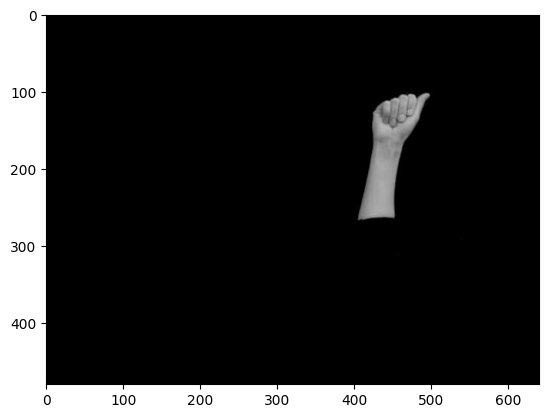

In [6]:
# img_npy = Image.open('/content/dataset/Person1-A-1-14.jpg')
# img_npy = img_npy.convert('RGB')


# plt.imshow(img_npy)
# print(type(img_npy))

In [7]:
# transform = pth_transforms.Compose([
#     pth_transforms.ToTensor(),
#     pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
# ])
# img = transform(img_npy)

# # make the image divisible by the patch size
# w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
# img = img[:, :w, :h].unsqueeze(0)

# w_featmap = img.shape[-2] // patch_size
# h_featmap = img.shape[-1] // patch_size

# #attentions = model.forward_selfattention(img.to(device))
# attentions = model.get_last_selfattention(img)   #img.cuda()

# print(type(img))
# print(img.shape)

<class 'torch.Tensor'>
torch.Size([1, 3, 480, 640])


In [8]:
# nh = attentions.shape[1] # number of head

# # we keep only the output patch attention
# attentions = attentions[0, :, 0, 1:].reshape(nh, -1)

# # we keep only a certain percentage of the mass
# val, idx = torch.sort(attentions)
# val /= torch.sum(val, dim=1, keepdim=True)
# cumval = torch.cumsum(val, dim=1)



# threshold = 0.6 # We visualize masks obtained by thresholding the self-attention maps to keep xx% of the mass.
# th_attn = cumval > (1 - threshold)
# idx2 = torch.argsort(idx)
# for head in range(nh):
#     th_attn[head] = th_attn[head][idx2[head]]

# th_attn = th_attn.reshape(nh, w_featmap//2, h_featmap//2).float()

# # interpolate
# th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

# attentions = attentions.reshape(nh, w_featmap//2, h_featmap//2)
# attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()
# attentions_mean = np.mean(attentions, axis=0)

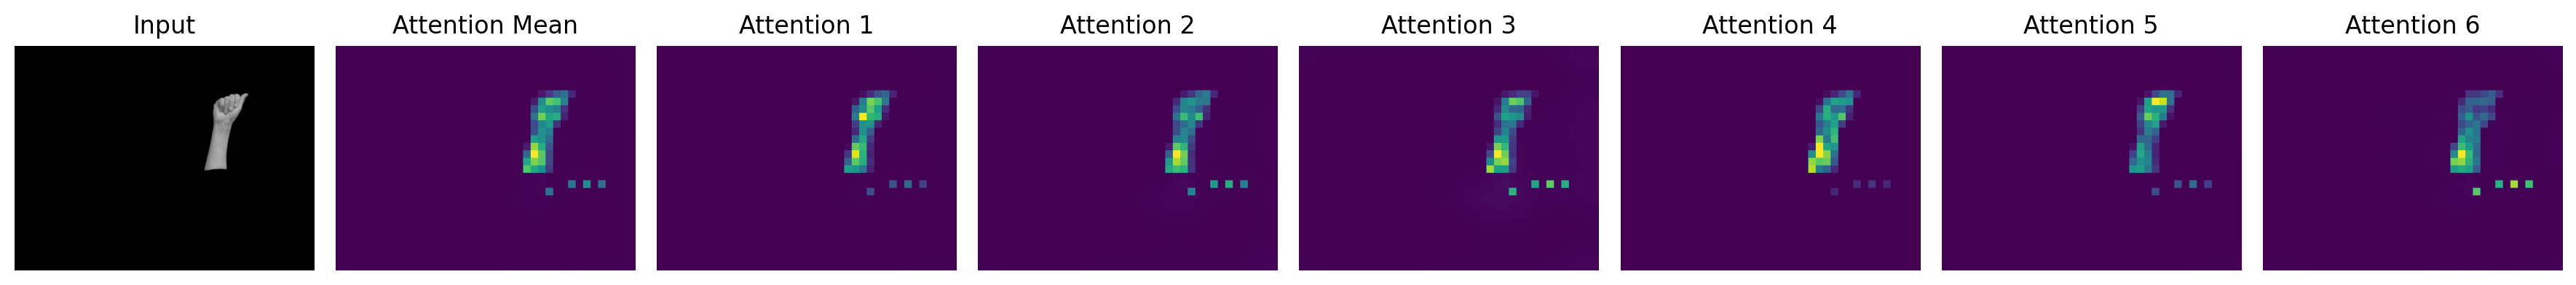

In [9]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 4), dpi=200)  # Adjust the figure width for a horizontal layout

# # First subplot: Input image
# plt.subplot(1, 9, 1)
# plt.title("Input")
# plt.imshow(img_npy)
# plt.axis("off")

# # Second subplot: Head Mean
# plt.subplot(1, 9, 2)
# plt.title("Attention Mean")
# plt.imshow(attentions_mean)
# plt.axis("off")

# # Remaining subplots: Visualizing self-attention of each head
# for i in range(6):
#     plt.subplot(1, 9, i + 3)
#     plt.title(f"Attention {i+1}")
#     plt.imshow(attentions[i])
#     plt.axis("off")

# plt.tight_layout()
# plt.show()


# Dino_Vit_S_B_16

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


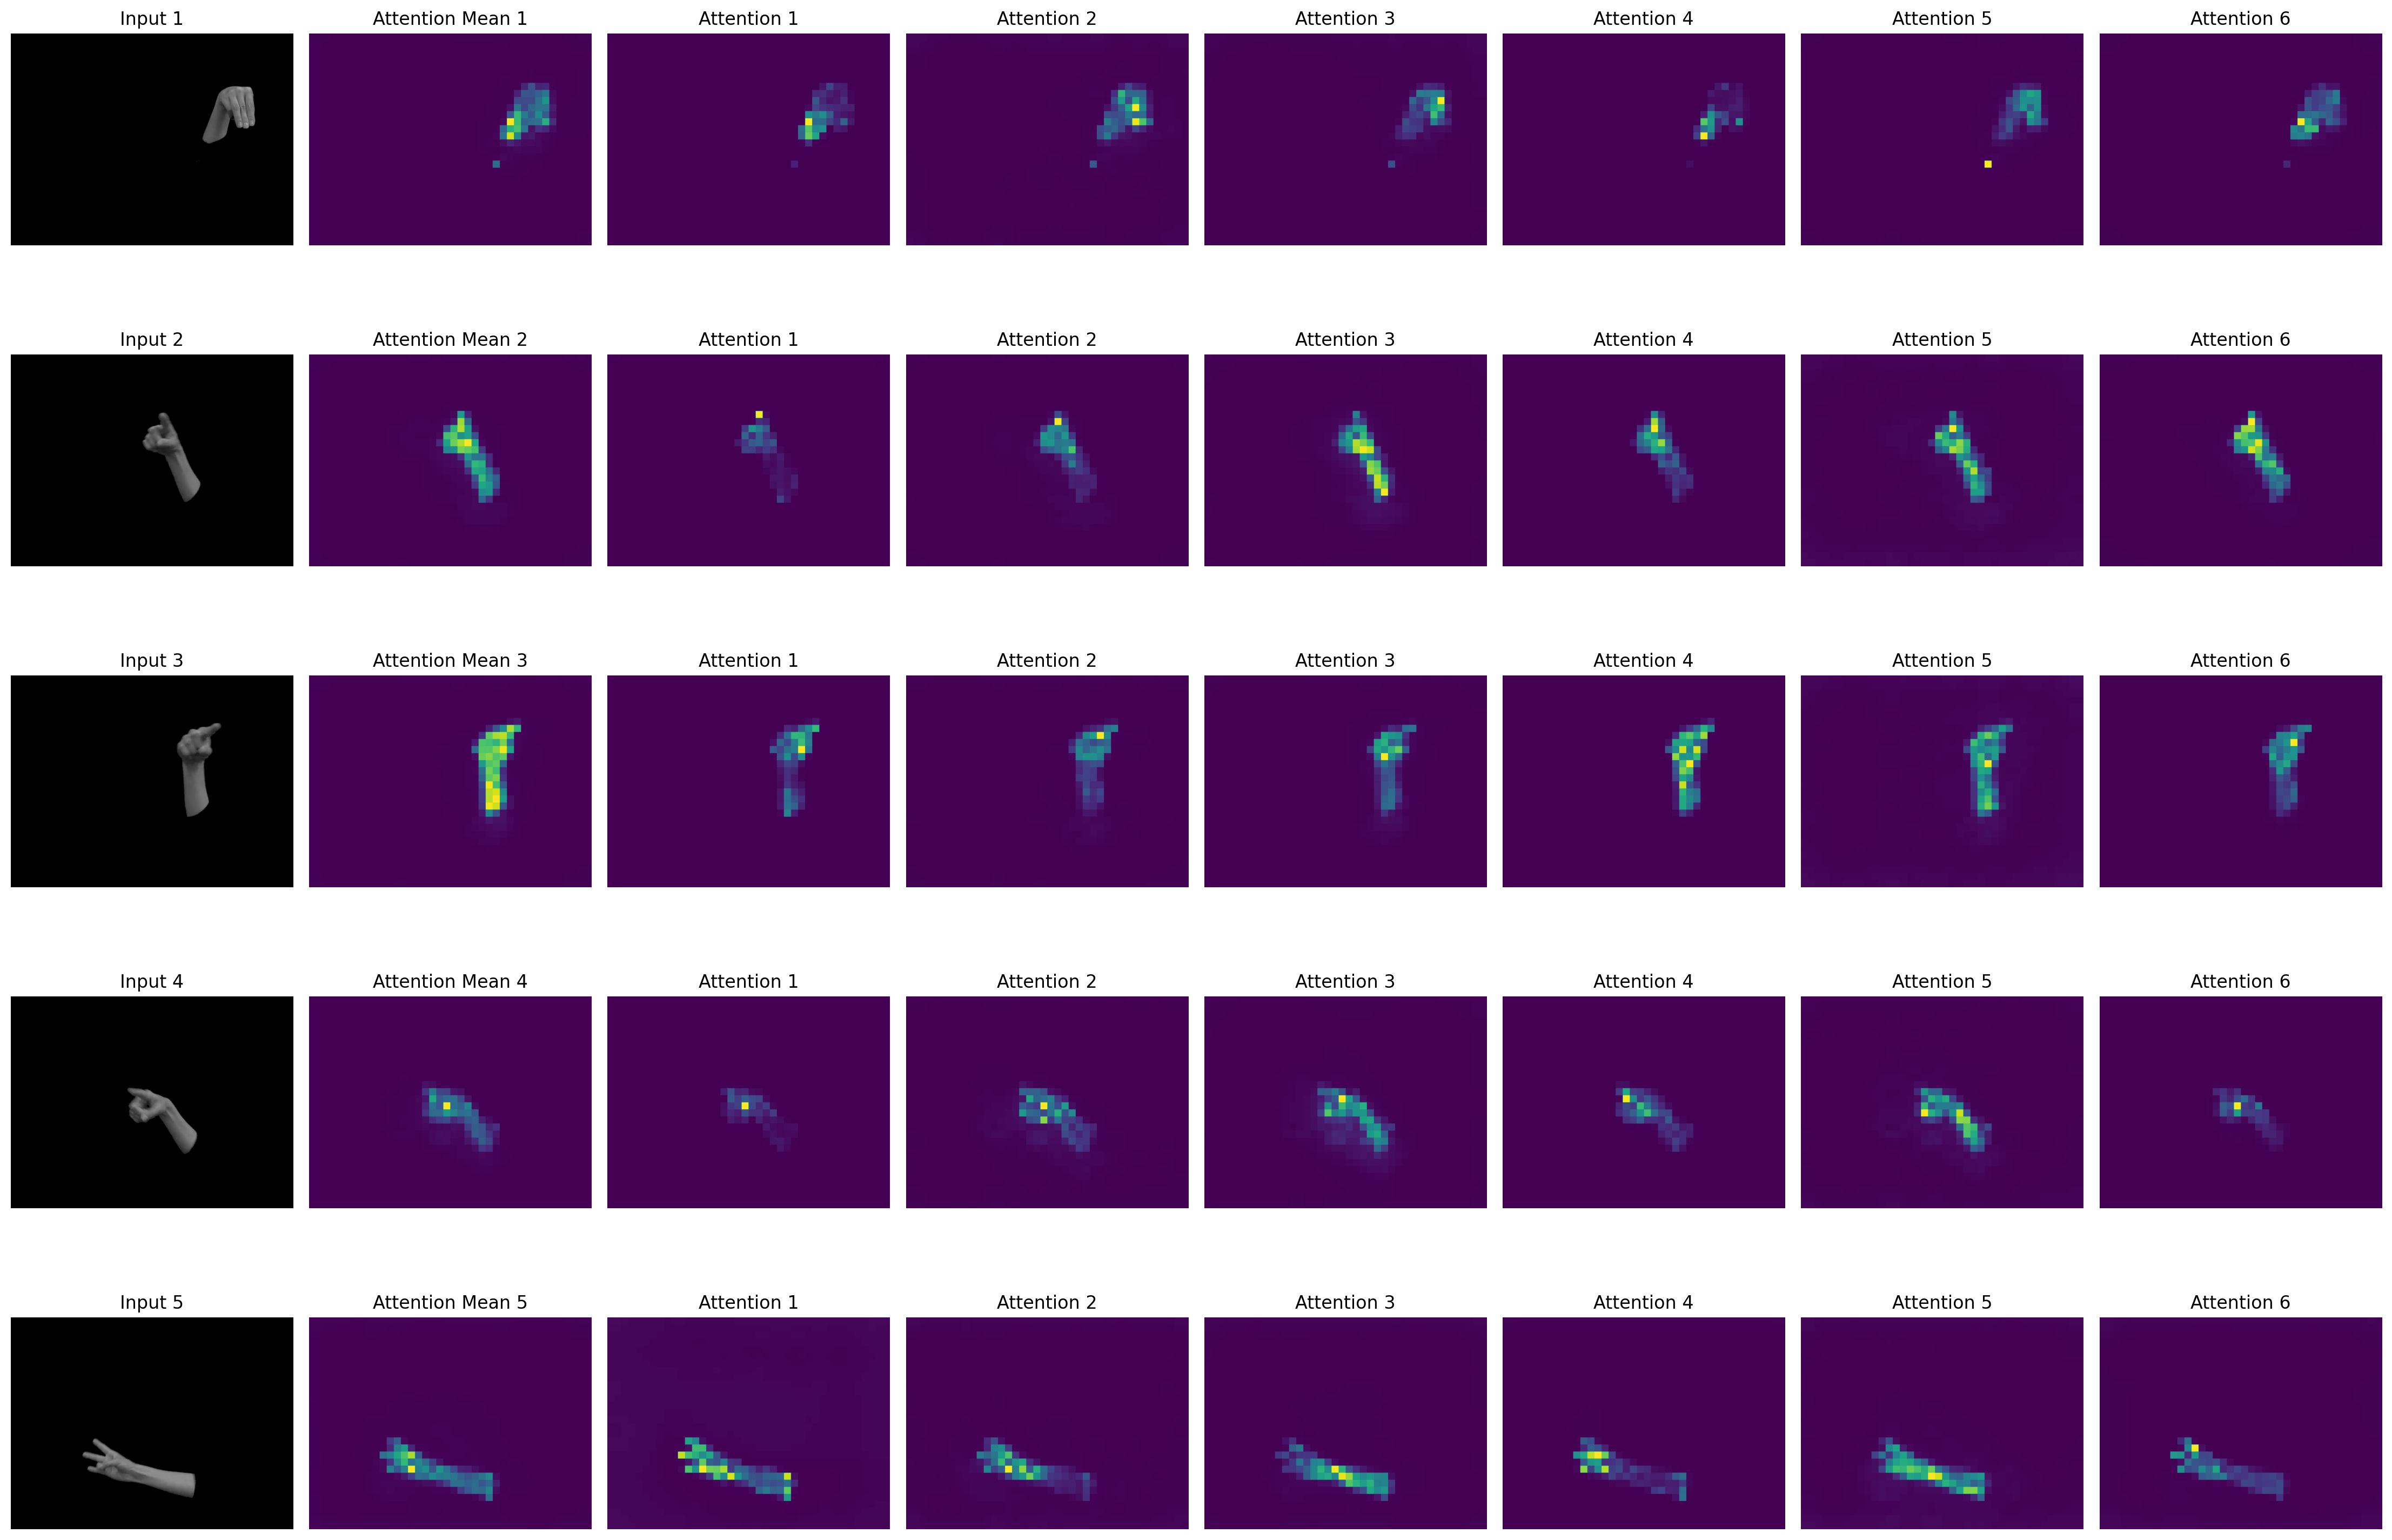

In [40]:
import os
import random
from PIL import Image
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import matplotlib.pyplot as plt

# Parameters
patch_size = 8
image_folder_path = '/content/dataset/'  # Replace with the path to your image folder

# Load the DINO model

# Load the DINO model (this is the standard DINO model, you can change to 'dino_vits8', 'dino_vitb8', etc.)
model = torch.hub.load('facebookresearch/dino:main', 'dino_vitb16')  # You can change to 'dino_vits8' or any other variant



# model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.eval().to(device)

# Freeze the model parameters
for p in model.parameters():
    p.requires_grad = False

# Image transformation
transform = pth_transforms.Compose([
    pth_transforms.ToTensor(),
    pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# List and randomly select 5 image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, 5)

# Function to process an image and get attention maps
def process_image(image_path):
    img_npy = Image.open(image_path).convert('RGB')
    img = transform(img_npy)

    # Make image divisible by patch size
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0).to(device)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    # Get the self-attention maps
    attentions = model.get_last_selfattention(img)
    nh = attentions.shape[1]  # number of heads

    # Extract and process the attention maps
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)
    val, idx = torch.sort(attentions)
    val /= torch.sum(val, dim=1, keepdim=True)
    cumval = torch.cumsum(val, dim=1)

    # Thresholding the attention maps
    threshold = 0.6
    th_attn = cumval > (1 - threshold)
    idx2 = torch.argsort(idx)
    for head in range(nh):
        th_attn[head] = th_attn[head][idx2[head]]

    th_attn = th_attn.reshape(nh, w_featmap // 2, h_featmap // 2).float()
    th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions = attentions.reshape(nh, w_featmap // 2, h_featmap // 2)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions_mean = np.mean(attentions, axis=0)

    return img_npy, attentions_mean, attentions, th_attn

# Create a large plot for visualizing the attention maps of all 5 images
plt.figure(figsize=(25, 15), dpi=200)

# Iterate over each random image and visualize its attention maps
for idx, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder_path, image_file)

    img_npy, attentions_mean, attentions, th_attn = process_image(image_path)

    # Plot the input image
    plt.subplot(5, 9, idx * 9 + 1)
    plt.title(f"Input {idx+1}")
    plt.imshow(img_npy)
    plt.axis("off")

    # Plot the mean attention
    plt.subplot(5, 9, idx * 9 + 2)
    plt.title(f"Attention Mean {idx+1}")
    plt.imshow(attentions_mean)
    plt.axis("off")

    # Plot the individual head attentions
    for i in range(6):
        plt.subplot(5, 9, idx * 9 + 3 + i)
        plt.title(f"Attention {i+1}")
        plt.imshow(attentions[i])
        plt.axis("off")

plt.tight_layout()
plt.show()


# Dino_vit_S_B_8


Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


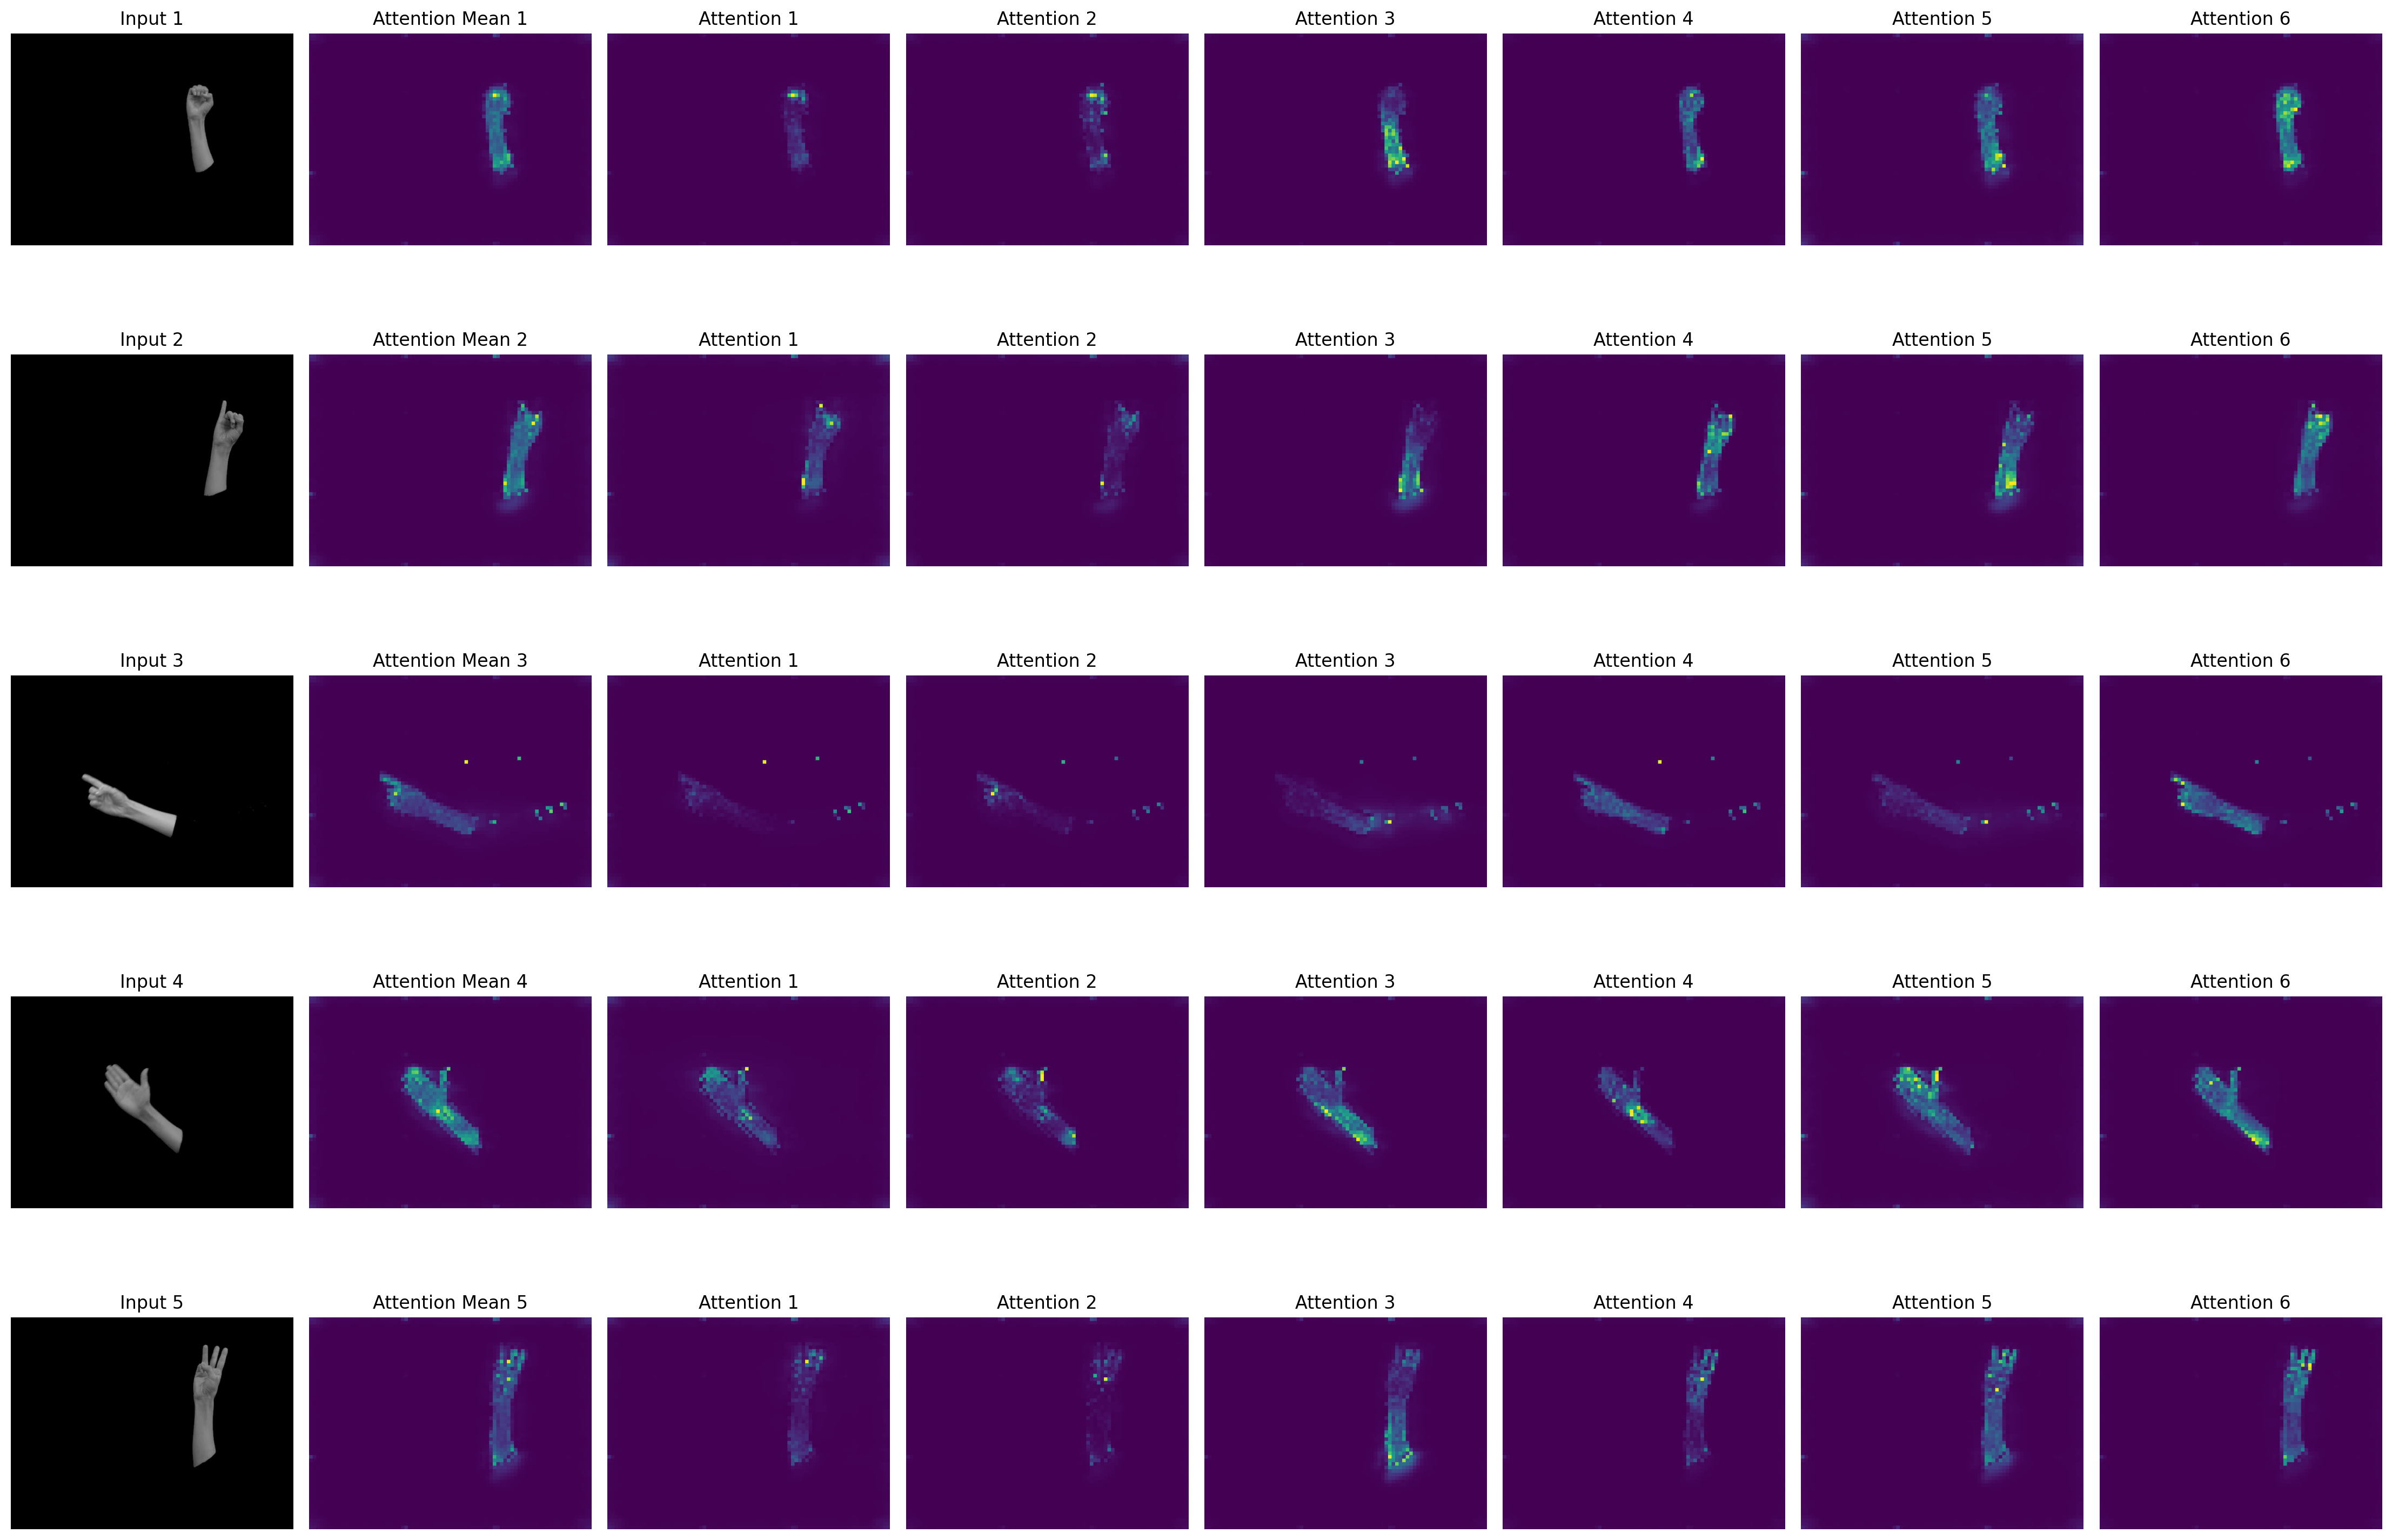

In [41]:
import os
import random
from PIL import Image
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import matplotlib.pyplot as plt
import numpy as np

# Parameters
patch_size = 8
image_folder_path = '/content/dataset/'  # Replace with the path to your image folder

# Load the DINO model (you can change this to test other variants like 'dino_vits8', 'dino_vitb8', etc.)
model = torch.hub.load('facebookresearch/dino:main', 'dino_vitb8')  # Default DINO model with 8x8 patches
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.eval().to(device)

# Freeze the model parameters
for p in model.parameters():
    p.requires_grad = False

# Image transformation
transform = pth_transforms.Compose([
    pth_transforms.ToTensor(),
    pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# List and randomly select 5 image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, 5)

# Function to process an image and get attention maps
def process_image(image_path):
    img_npy = Image.open(image_path).convert('RGB')
    img = transform(img_npy)

    # Make image divisible by patch size (8x8 for dino_vits8)
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0).to(device)

    # Get the self-attention maps
    attentions = model.get_last_selfattention(img)
    nh = attentions.shape[1]  # number of heads

    # Extract and process the attention maps
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)
    val, idx = torch.sort(attentions)
    val /= torch.sum(val, dim=1, keepdim=True)
    cumval = torch.cumsum(val, dim=1)

    # Thresholding the attention maps
    threshold = 0.6
    th_attn = cumval > (1 - threshold)
    idx2 = torch.argsort(idx)
    for head in range(nh):
        th_attn[head] = th_attn[head][idx2[head]]

    # Image dimensions
    w_featmap = img.shape[2] // patch_size  # Width of feature map (number of patches in width)
    h_featmap = img.shape[3] // patch_size  # Height of feature map (number of patches in height)

    # Now, reshape the attention maps to match the patch grid dimensions
    attentions = attentions.reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    th_attn = th_attn.reshape(nh, w_featmap, h_featmap).float()
    th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions_mean = np.mean(attentions, axis=0)

    return img_npy, attentions_mean, attentions, th_attn

# Create a large plot for visualizing the attention maps of all 5 images
plt.figure(figsize=(25, 15), dpi=200)

# Iterate over each random image and visualize its attention maps
for idx, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder_path, image_file)

    img_npy, attentions_mean, attentions, th_attn = process_image(image_path)

    # Plot the input image
    plt.subplot(5, 9, idx * 9 + 1)
    plt.title(f"Input {idx+1}")
    plt.imshow(img_npy)
    plt.axis("off")

    # Plot the mean attention
    plt.subplot(5, 9, idx * 9 + 2)
    plt.title(f"Attention Mean {idx+1}")
    plt.imshow(attentions_mean)
    plt.axis("off")

    # Plot the individual head attentions
    for i in range(6):
        plt.subplot(5, 9, idx * 9 + 3 + i)
        plt.title(f"Attention {i+1}")
        plt.imshow(attentions[i])
        plt.axis("off")

plt.tight_layout()
plt.show()


# With Overlay

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


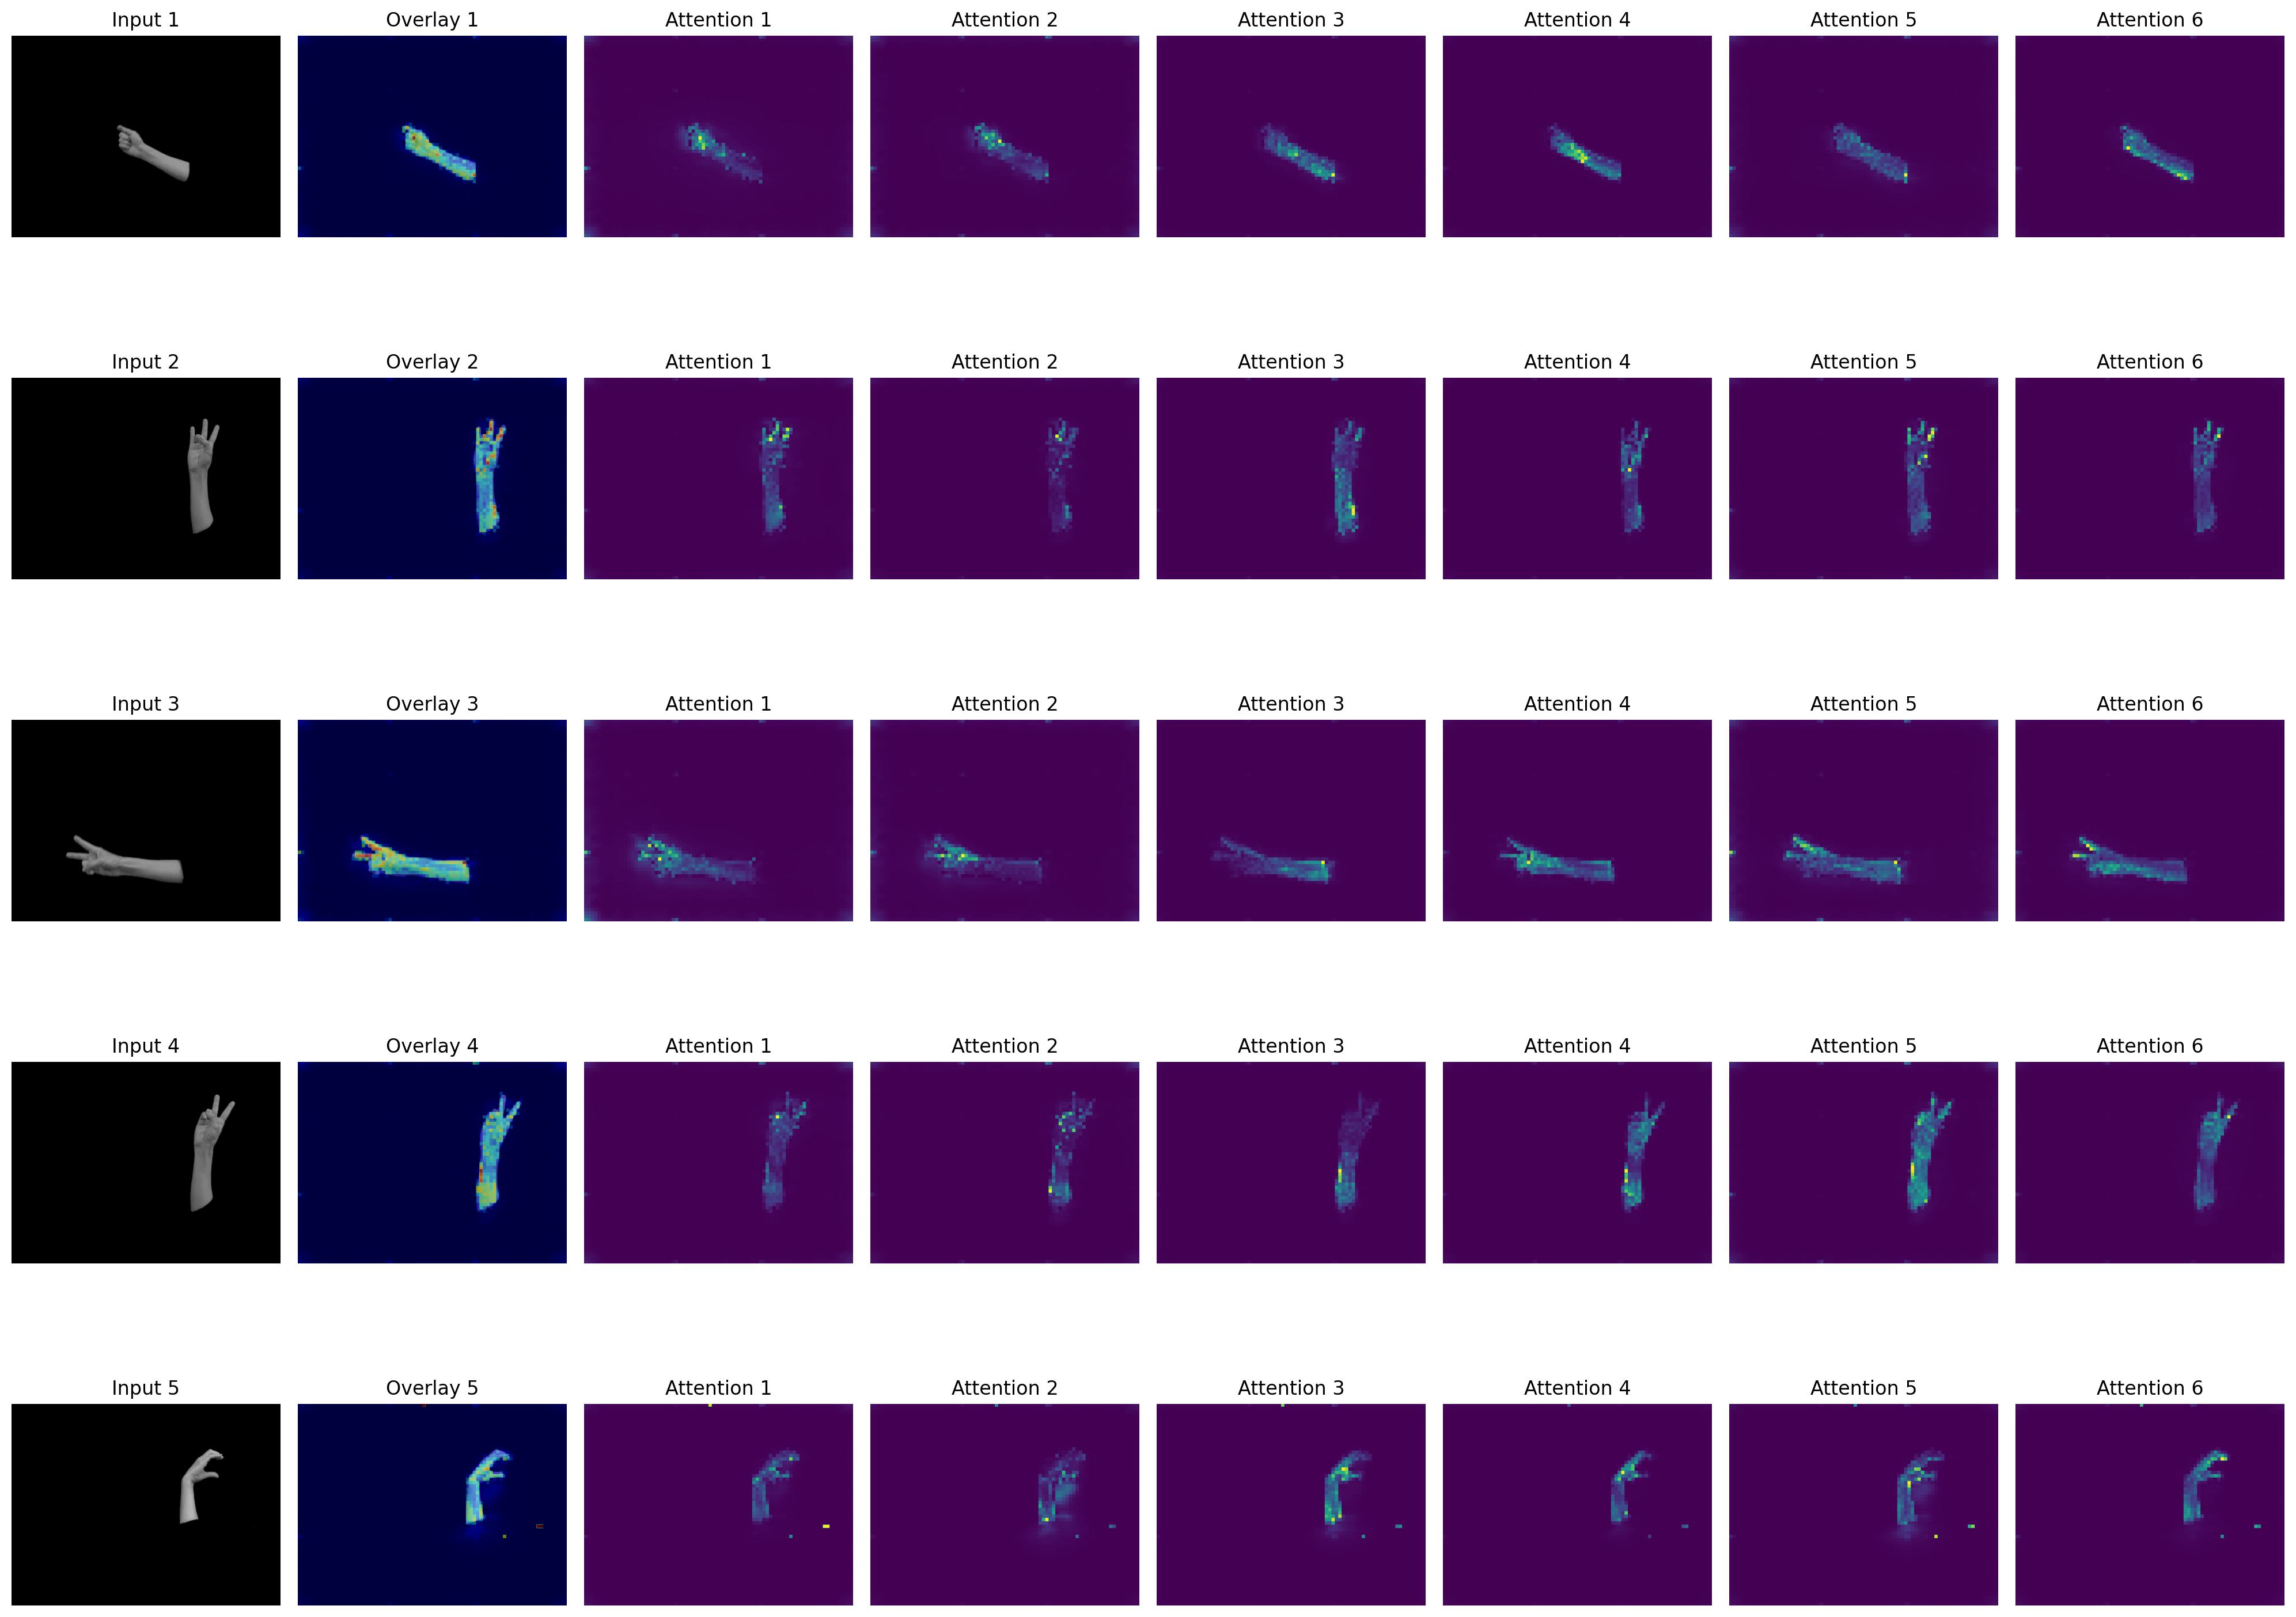

In [37]:
import os
import random
from PIL import Image
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import matplotlib.pyplot as plt
import numpy as np

# Parameters
patch_size = 8
image_folder_path = '/content/dataset/'  # Replace with the path to your image folder
output_path = "/content/output/"  # Directory to save visualizations
os.makedirs(output_path, exist_ok=True)

# Load the DINO model
model = torch.hub.load('facebookresearch/dino:main', 'dino_vitb16')  # You can change to 'dino_vits16' or others
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.eval().to(device)

# Freeze the model parameters
for p in model.parameters():
    p.requires_grad = False

# Image transformation
transform = pth_transforms.Compose([
    pth_transforms.ToTensor(),
    pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# List and randomly select 5 image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, 5)

# Function to process an image and get attention maps
def process_image(image_path):
    img_npy = Image.open(image_path).convert('RGB')
    img = transform(img_npy)

    # Make image divisible by patch size
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0).to(device)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    # Get the self-attention maps
    attentions = model.get_last_selfattention(img)
    nh = attentions.shape[1]  # number of heads

    # Extract and process the attention maps
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)
    val, idx = torch.sort(attentions)
    val /= torch.sum(val, dim=1, keepdim=True)
    cumval = torch.cumsum(val, dim=1)

    # Thresholding the attention maps
    threshold = 0.6
    th_attn = cumval > (1 - threshold)
    idx2 = torch.argsort(idx)
    for head in range(nh):
        th_attn[head] = th_attn[head][idx2[head]]

    th_attn = th_attn.reshape(nh, w_featmap, h_featmap).float()
    th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions = attentions.reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions_mean = np.mean(attentions, axis=0)

    return img_npy, attentions_mean, attentions, th_attn

# Overlay attention on the image for better interpretability
def visualize_attention_overlay(img_npy, attention_map):
    plt.imshow(img_npy)
    plt.imshow(attention_map, alpha=0.5, cmap='jet')  # Overlay attention
    plt.axis("off")

# Create a large plot for visualizing the attention maps of all 5 images
plt.figure(figsize=(25, 15), dpi=200)

# Iterate over each random image and visualize its attention maps
for idx, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder_path, image_file)

    img_npy, attentions_mean, attentions, th_attn = process_image(image_path)

    # Plot the input image
    plt.subplot(5, 10, idx * 10 + 1)
    plt.title(f"Input {idx+1}")
    plt.imshow(img_npy)
    plt.axis("off")

    # Plot mean attention (overlay)
    plt.subplot(5, 10, idx * 10 + 2)
    plt.title(f"Overlay {idx+1}")
    visualize_attention_overlay(img_npy, attentions_mean)

    # Plot individual head attentions
    num_heads_to_plot = min(6, attentions.shape[0])  # Dynamically adjust
    for i in range(num_heads_to_plot):
        plt.subplot(5, 10, idx * 10 + 3 + i)
        plt.title(f"Attention {i+1}")
        plt.imshow(attentions[i], cmap="viridis")
        plt.axis("off")

    # Save the visualization of the current image
    plt.savefig(os.path.join(output_path, f"attention_visualization_{idx+1}.png"))

plt.tight_layout()
plt.show()


In [3]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/Person1.zip'
extract_folder = '/content/dataset/'

# Ensure the extraction folder exists
os.makedirs(extract_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check the extracted contents
os.listdir(extract_folder)


['Person1-W-1-55.jpg',
 'Person1-R-1-3.jpg',
 'Person1-T-3-22.jpg',
 'Person1-Z-1-70.jpg',
 'Person1-P-2-33.jpg',
 'Person1-S-1-38.jpg',
 'Person1-E-3-42.jpg',
 'Person1-W-2-113.jpg',
 'Person1-T-1-62.jpg',
 'Person1-W-3-84.jpg',
 'Person1-O-2-90.jpg',
 'Person1-S-1-86.jpg',
 'Person1-M-2-61.jpg',
 'Person1-P-1-10.jpg',
 'Person1-L-3-130.jpg',
 'Person1-M-3-70.jpg',
 'Person1-S-2-92.jpg',
 'Person1-J-1-61.jpg',
 'Person1-N-3-38.jpg',
 'Person1-T-1-40.jpg',
 'Person1-H-1-43.jpg',
 'Person1-X-1-69.jpg',
 'Person1-G-2-114.jpg',
 'Person1-E-1-92.jpg',
 'Person1-T-2-67.jpg',
 'Person1-V-1-79.jpg',
 'Person1-K-1-63.jpg',
 'Person1-S-1-79.jpg',
 'Person1-K-3-87.jpg',
 'Person1-R-2-3.jpg',
 'Person1-L-3-104.jpg',
 'Person1-E-1-110.jpg',
 'Person1-R-3-100.jpg',
 'Person1-G-2-106.jpg',
 'Person1-Z-2-14.jpg',
 'Person1-K-1-85.jpg',
 'Person1-T-1-83.jpg',
 'Person1-D-3-5.jpg',
 'Person1-D-3-36.jpg',
 'Person1-H-1-10.jpg',
 'Person1-N-3-116.jpg',
 'Person1-G-3-28.jpg',
 'Person1-Z-1-86.jpg',
 'Pers

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


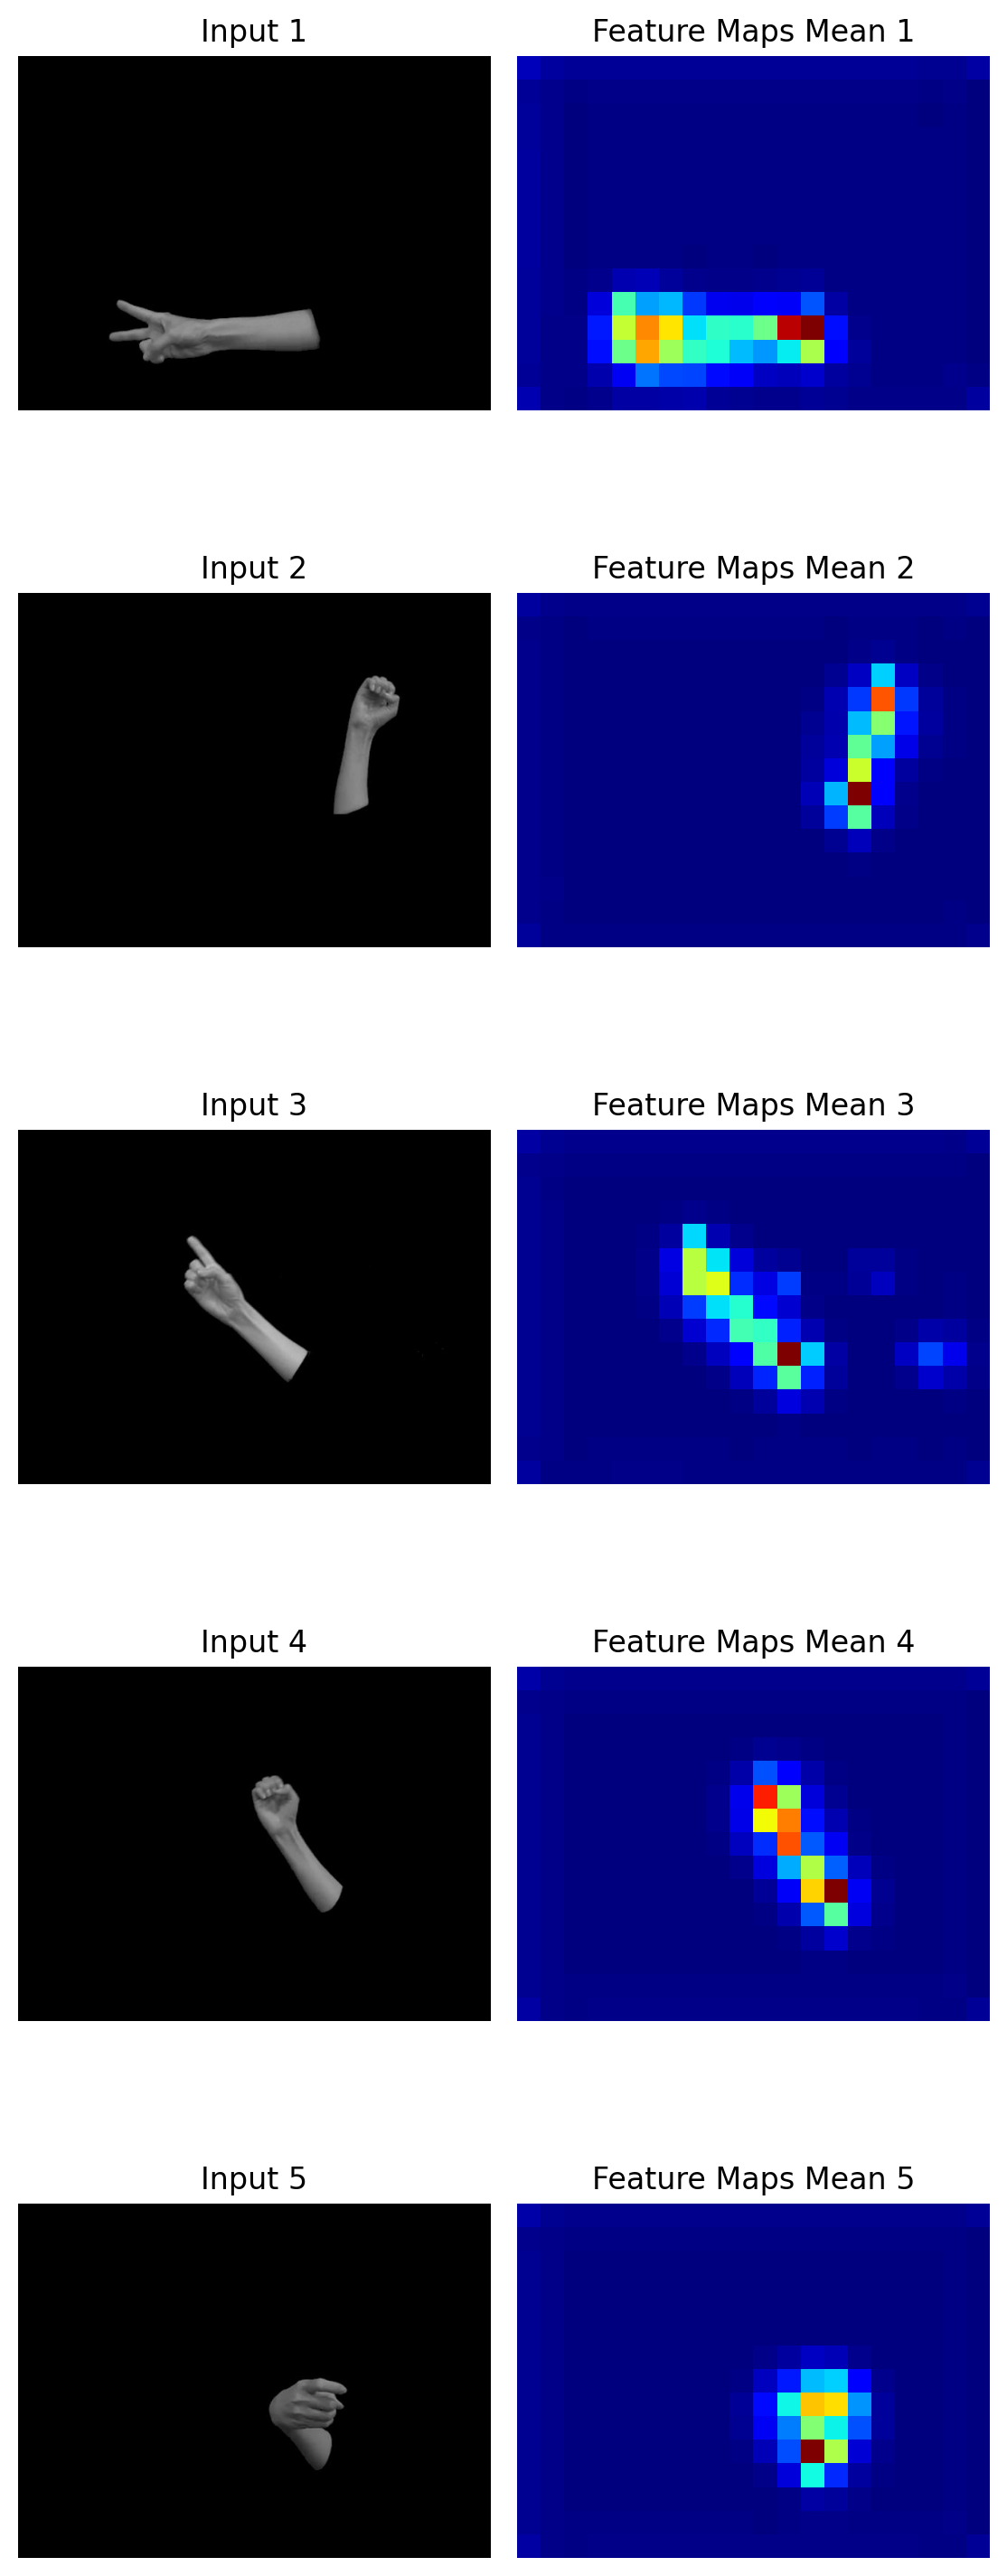

In [17]:
import os
import random
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms as pth_transforms
import matplotlib.pyplot as plt

# Parameters
patch_size = 16  # Patch size for ResNet-50 (or other model)
image_folder_path = '/content/dataset/'  # Path to your image folder

# Load the DINO ResNet-50 model
model = torch.hub.load('facebookresearch/dino:main', 'dino_resnet50')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval().to(device)

# Freeze the model parameters to avoid updating during inference
for p in model.parameters():
    p.requires_grad = False

# Image transformation (for input preprocessing)
transform = pth_transforms.Compose([
    pth_transforms.ToTensor(),
    pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # ImageNet normalization
])

# List and randomly select 5 image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, 5)

# Global variable to store feature maps
feature_maps = None

# Hook function to capture feature maps from the final block
def save_feature_maps_hook(module, input, output):
    global feature_maps
    # Capture the output from the last layer block (feature map)
    feature_maps = output  # output is the feature map after convolution

# Register the hook to the last block in the ResNet-50 model
hook = model.layer4[2].register_forward_hook(save_feature_maps_hook)  # Example: 2nd block in last layer group

# Function to process the image and get feature maps
def process_image(image_path):
    img_npy = Image.open(image_path).convert('RGB')

    # Resize image to make it divisible by the patch size (16)
    width, height = img_npy.size
    new_width = width - (width % patch_size)  # Adjust width to be divisible by patch_size
    new_height = height - (height % patch_size)  # Adjust height similarly
    img_npy = img_npy.resize((new_width, new_height))

    # Apply transformation and add batch dimension (NCHW)
    img = transform(img_npy).unsqueeze(0).to(device)

    # Forward pass to capture feature maps
    with torch.no_grad():
        _ = model(img)  # This triggers the forward pass and the hook to capture the feature maps

    # Process the captured feature maps (average the feature maps)
    feature_maps_mean = feature_maps.mean(dim=1).squeeze(0).cpu().numpy()  # Average across channels

    # Return original image and processed feature map
    return img_npy, feature_maps_mean

# Create a plot for visualizing the feature maps of all 5 images
plt.figure(figsize=(25, 15), dpi=200)

# Iterate over each selected image and visualize its feature maps
for idx, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder_path, image_file)

    img_npy, feature_maps_mean = process_image(image_path)

    # Plot the input image
    plt.subplot(5, 9, idx * 9 + 1)
    plt.title(f"Input {idx+1}")
    plt.imshow(img_npy)
    plt.axis("off")

    # Plot the feature maps (mean of all channels)
    plt.subplot(5, 9, idx * 9 + 2)
    plt.title(f"Feature Maps Mean {idx+1}")
    plt.imshow(feature_maps_mean, cmap='jet')
    plt.axis("off")

plt.tight_layout()
plt.show()

# Remove the hook after use
hook.remove()
